<a href="https://colab.research.google.com/github/kvs1998/Practical-Deep-Learning-for-Coders-v3/blob/main/lesson01_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LESSON 1 PETS** 🐶

In [1]:
# edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset

Saving kaggle.json to kaggle.json
100% 1.47G/1.48G [00:16<00:00, 101MB/s]
100% 1.48G/1.48G [00:16<00:00, 95.5MB/s]


In [5]:
! mkdir train
! unzip /content/the-oxfordiiit-pet-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/images/images/leonberger_81.jpg  
  inflating: train/images/images/leonberger_82.jpg  
  inflating: train/images/images/leonberger_83.jpg  
  inflating: train/images/images/leonberger_84.jpg  
  inflating: train/images/images/leonberger_85.jpg  
  inflating: train/images/images/leonberger_86.jpg  
  inflating: train/images/images/leonberger_87.jpg  
  inflating: train/images/images/leonberger_88.jpg  
  inflating: train/images/images/leonberger_89.jpg  
  inflating: train/images/images/leonberger_9.jpg  
  inflating: train/images/images/leonberger_90.jpg  
  inflating: train/images/images/leonberger_91.jpg  
  inflating: train/images/images/leonberger_92.jpg  
  inflating: train/images/images/leonberger_93.jpg  
  inflating: train/images/images/leonberger_94.jpg  
  inflating: train/images/images/leonberger_95.jpg  
  inflating: train/images/images/leonberger_96.jpg  
  inflating: train/images/images/leonberger_97.jp

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [11]:
path = Path('/content/train/images/images'); path

PosixPath('/content/train/images/images')

In [12]:
path.ls()[:2]

[PosixPath('/content/train/images/images/newfoundland_15.jpg'),
 PosixPath('/content/train/images/images/saint_bernard_40.jpg')]

In [13]:
#path objects better than strings
path_anno = path/'annotations'
path_image = path/'images'

In [14]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c: Union[pathlib.Path, str], check_ext: bool = True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [19]:
fnames = get_image_files(path) 
fnames[:5]

[PosixPath('/content/train/images/images/newfoundland_15.jpg'),
 PosixPath('/content/train/images/images/saint_bernard_40.jpg'),
 PosixPath('/content/train/images/images/japanese_chin_40.jpg'),
 PosixPath('/content/train/images/images/Maine_Coon_160.jpg'),
 PosixPath('/content/train/images/images/Siamese_233.jpg')]

In [24]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [26]:
#here only sqaure images
#will return a databunch object (ImageDataBunch is an object)
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms = get_transforms(),
                                   size=224, bs=bs)
#data same size
data.normalize(imagenet_stats)  

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


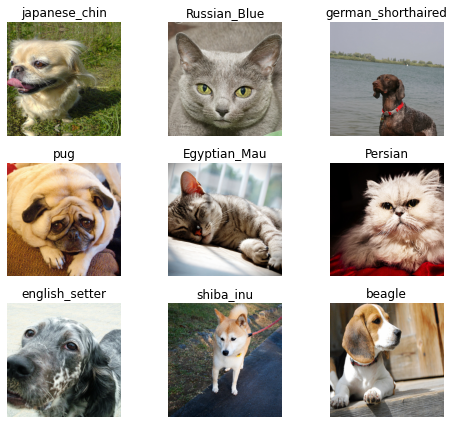

In [29]:
data.show_batch(rows = 3, figsize=(7,6) )